# Runge Kutta Ordem 4

Esse é um experimento para testar Runge Kutta Ordem 4 na resolução de EDOs (Equações Diferenciais Ordinárias).

Equações:

$k_1 = hf(t_n,y_n)$

$k_2 = hf(t_n + \frac{h}{2},y_n + \frac{k_1}{2})$

$k_3 = hf(t_n + \frac{h}{2}, y_n + \frac{k_2}{2})$

$k_4 = hf(t_n + h, y_n + k_3)$

$y_{n + 1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

In [10]:
def runge_kutta_4(f, t0, y0, h, n):
  t = t0
  y = y0

  ts = [t0]
  ys = [y0]

  for _ in range(n):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    y += (k1 + 2*k2 + 2*k3 + k4) / 6
    t += h
    ts.append(t)
    ys.append(y)

  return ts, ys

Exemplo 1:

$y' = -2ty + 1$

$y(0) = 1$


Intervalo: [0,1]

Passo: 0.1

In [2]:
def edo(t, y):
  return -2*t*y + 1

In [3]:
import math

In [4]:
t0 = 0
y0 = 1
h = 0.1
n = math.floor(1 / h)

In [11]:
ts, ys = runge_kutta_4(edo, t0, y0, h, n)

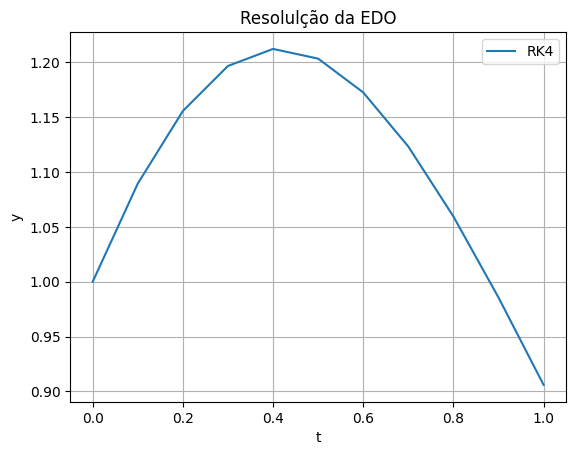

In [12]:
import matplotlib.pyplot as plt

plt.plot(ts, ys,  label="RK4")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Resolulção da EDO')
plt.legend()
plt.grid(True)
plt.show()

Exemplo 2: Temperatura de uma barra aquecida. Queremos determinar a perda de temperatura da barra com o tempo.

EDO de temperatura:

$\frac{dT}{dt} = -k(T - T_{amb}) + q(t)$

onde:

- $T(t)$ é a temperatura da barra no tempo $t$
- $T_{amb}$ é a temperatura ambiente
- $k$ é uma constante que depende das propriedades da barra e do ambiente
- $q(t)$ é uma função que representa a taxa de aquecimento fornecida pelo forno

dado:

- $T(0) = 100$
- $q(t) = 0$ (assumieremos que não tem nada cedendo calor para a barra. Ela está na sombra)
- $T_{amb} = 25$
- k = iremos descobrir



Propriedades do aço carbono:

- $ C = 500\frac{J}{kg}K$

- $densidade (d) = 7850 \frac{kg}{m^3}$

- $coeficiente \ de \ transferência de calor (h) = 10 \frac{W}{m^2}K$

Dimensões da barra:

- $Comprimento (L) = 1 m$

- $Diâmetro (D) = 0.1 m$

Área da barra cilíndrica:

$A = 2 \pi R^2 + 2 \pi RL$

$A = 2 \pi (\frac{D}{2})^2 + 2 \pi (\frac{D}{2}L)$

$A \approx 0.33 m^2$

Massa da barra:

$V = \pi R^2 L$

$V = \pi(\frac{D}{2})^2L$

$V \approx 0.0078 m^3$

$m = Vd$

$m \approx 7850 * 0.0078 $

$m \approx 61.23 kg$

Taxa de resfriamento k:

$k = \frac{hA}{mC}$

$k \approx \frac{10 * 0.33}{61.23 * 500}$

$k \approx 1.07 x 10^{-4} s^{-1}$

In [13]:
C = 500
d = 7850
h = 10

In [14]:
L = 1
D = 0.1

In [15]:
R = D/2

In [16]:
def bar_area(R, L):
  return 2 * math.pi * R**2 + 2 * math.pi * R * L

In [17]:
def volume_bar(R, L):
  return math.pi * R**2 * L

In [18]:
A = bar_area(R, L)
V = volume_bar(R, L)
m = V * d

In [24]:
def calc_k(h, A, m, C):
  return (h * A) / (m * C)

In [25]:
k = calc_k(h, A, m, C)

y = Temperatura

In [50]:
T_amb = 25
T0 = 100
step = 1
n = 40000

In [28]:
def edo(t, y):
  return -k * (y - T_amb)

In [51]:
ts, ys = runge_kutta_4(edo, 0, T0, step, n)

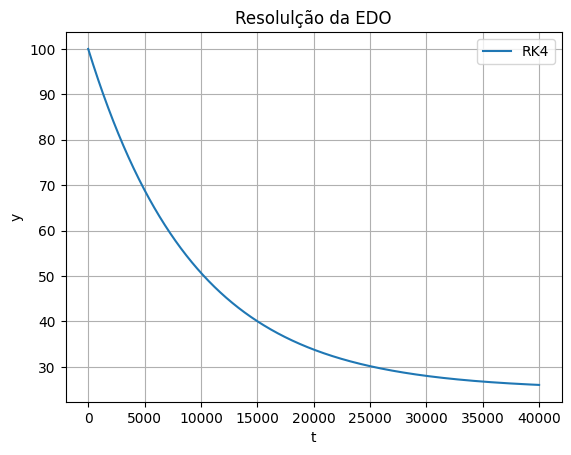

In [52]:
plt.plot(ts, ys,  label="RK4")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Resolulção da EDO')
plt.legend()
plt.grid(True)
plt.show()

**Versão 2** da RK específica para esse problema:

In [53]:
import numpy as np

In [55]:
def runge_kutta_4(f, T0, t_final, h):
  t_values = np.arange(0, t_final + h, h)
  T_values = np.zeros(len(t_values))
  T_values[0] = T0
  
  for i in range(1, len(t_values)):
    t_n = t_values[i-1]
    T_n = T_values[i-1]
    
    k1 = h * f(t_n, T_n)
    k2 = h * f(t_n + 0.5*h, T_n + 0.5*k1)
    k3 = h * f(t_n + 0.5*h, T_n + 0.5*k2)
    k4 = h * f(t_n + h, T_n + k3)
    
    T_values[i] = T_n + (k1 + 2*k2 + 2*k3 + k4) / 6
  
  return t_values, T_values

In [ ]:
t_final = 40000

In [56]:
t_values, T_values = runge_kutta_4(edo, T0, 40000, step)

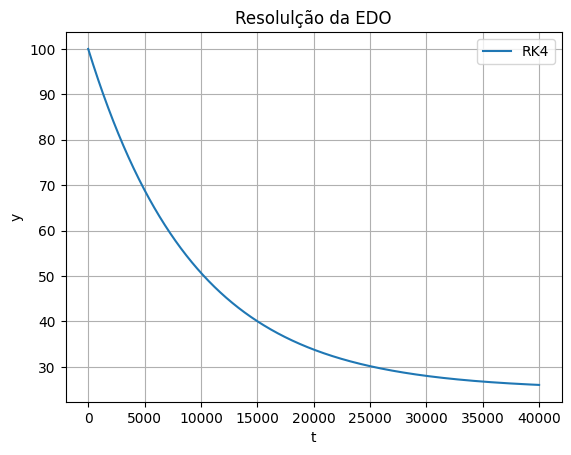

In [57]:
plt.plot(ts, ys,  label="RK4")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Resolulção da EDO')
plt.legend()
plt.grid(True)
plt.show()